In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import norm, inv
from numpy import transpose
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import seaborn as sns

In [3]:
wage_data = pd.read_csv('../../Datasets/Others/wage-data/wage.csv')

In [4]:
wage_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


In [5]:
wage_data.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [6]:
wage_data["maritl"].value_counts()

2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: maritl, dtype: int64

In [7]:
wage_data["race"].value_counts()

1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: race, dtype: int64

In [8]:
wage_data["education"].value_counts()

2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: education, dtype: int64

In [9]:
wage_data["jobclass"].value_counts()

1. Industrial     1544
2. Information    1456
Name: jobclass, dtype: int64

In [10]:
wage_data["jobclass"].value_counts()

1. Industrial     1544
2. Information    1456
Name: jobclass, dtype: int64

In [11]:
def f(x):
    if isinstance(x, str):
        return x.split(".")[-1].strip()
    else:
        return x

def g(x):
    if isinstance(x, str):
        return int(x.split(".")[0].strip())
    else:
        return x

wage_data_clean = wage_data.copy()
wage_data_clean["education"] = wage_data["education"].apply(g)
wage_data_clean["race"] = wage_data["race"].apply(f)
wage_data_clean["maritl"] = wage_data["maritl"].apply(lambda x: 0 if x == "2. Married" else 1)
wage_data_clean["region"] = wage_data["region"].apply(f)
wage_data_clean["jobclass"] = wage_data["jobclass"].apply(g)
wage_data_clean["health"] = wage_data["health"].apply(g)
wage_data_clean["health_ins"] = wage_data["health_ins"].apply(g)

In [12]:
wage_data_clean.head(10)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1,White,1,Middle Atlantic,1,1,2,4.318063,75.043154
1,2004,24,1,White,4,Middle Atlantic,2,2,2,4.255273,70.476020
2,2003,45,0,White,3,Middle Atlantic,1,1,1,4.875061,130.982177
3,2003,43,0,Asian,4,Middle Atlantic,2,2,1,5.041393,154.685293
4,2005,50,1,White,2,Middle Atlantic,2,1,1,4.318063,75.043154
5,2008,54,0,White,4,Middle Atlantic,2,2,1,4.845098,127.115744
6,2009,44,0,Other,3,Middle Atlantic,1,2,1,5.133021,169.528538
7,2008,30,1,Asian,3,Middle Atlantic,2,1,1,4.716003,111.720849
8,2006,41,1,Black,3,Middle Atlantic,2,2,1,4.778151,118.884359
9,2004,52,0,White,2,Middle Atlantic,2,2,1,4.857332,128.680488


In [13]:
wage_clean = wage_data_clean.drop(labels=["race", "region"], axis=1)

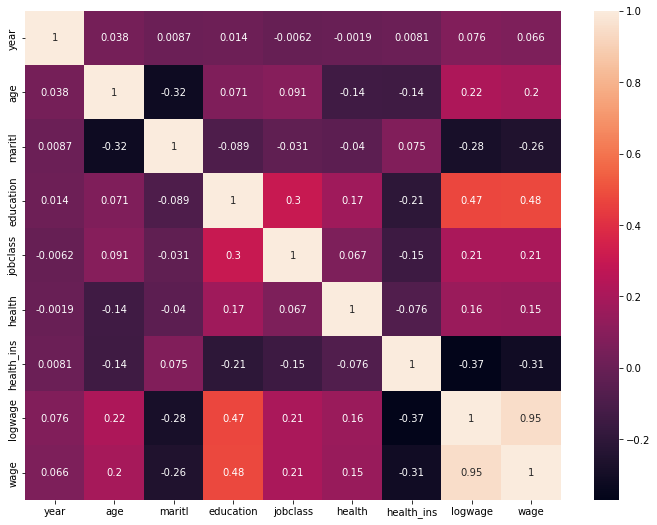

In [14]:
plt.figure(figsize=(12,9 ))
sns.heatmap(wage_clean.corr(), annot=True)
plt.show()

Wage and logwage are extremely correlated

In [15]:
wage_clean.drop(labels=["logwage"], axis=1, inplace=True)

In [16]:
wage_clean

,year,age,maritl,education,jobclass,health,health_ins,wage
0,2006,18,1,1,1,1,2,75.043154
1,2004,24,1,4,2,2,2,70.476020
2,2003,45,0,3,1,1,1,130.982177
3,2003,43,0,4,2,2,1,154.685293
4,2005,50,1,2,2,1,1,75.043154
...,...,...,...,...,...,...,...,...
2995,2008,44,0,3,1,2,1,154.685293
2996,2007,30,0,2,1,2,2,99.689464
2997,2005,27,0,1,1,1,2,66.229408
2998,2005,27,1,3,1,2,1,87.981033


### Scaling and splitting

In [17]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
target = ["wage"]
predictors = list(set(wage_clean.columns) - set(target))
X = wage_clean[predictors].values
y = wage_clean[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape

(2400, 7)

In [20]:
y_train.shape

(2400, 1)

In [21]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [22]:
regressor = LinearRegression()
regressor.fit(X=X_train_scaled, y=y_train)
y_pred = regressor.predict(X_test_scaled)

In [23]:
regressor.coef_

array([[16.08401604,  4.36030341,  1.65708975,  2.39349746, -7.14441342,
        -7.62967198,  3.26395813]])

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
mean_squared_error(y_true=y_test, y_pred=y_pred)

982.817327151373

In [26]:
r2_score(y_true=y_test, y_pred=y_pred)

0.3695920462426965

### MBGD v2

In [158]:
import random
class MiniBatchGenerator:
    def __init__(self, X, y, batch_size=32):
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.d = X.shape[1]
        self.batch_size = batch_size
        self.batches = []
        
    def generate_batches(self):
        print(f"Generating minibatch. Batch size: {self.batch_size}, data: {self.n}")
        X = self.X
        y = self.y
        n = self.n
        d = self.d
        batch_size = self.batch_size
    
        random_offset = 0 if n % batch_size == 0 else np.random.randint(low=0, high=(n%batch_size))
        last = (n // batch_size) * batch_size
        
        X_trunc = X[random_offset: random_offset+last]
        y_trunc = y[random_offset: random_offset+last]
        
        X_minibatch = X_trunc.reshape(((n // batch_size), batch_size, d))
        y_minibatch = y_trunc.reshape(((n // batch_size), batch_size))
        
        minibatches = list(zip(X_minibatch, y_minibatch))
        random.shuffle(minibatches)
        print(X_minibatch.shape)
        self.batches = minibatches

    def __next__(self):
        if not self.batches:
            self.generate_batches()
            
        return self.batches.pop(0)

    
def loss_function(X, y, w, w0, n):
    ones = np.ones(shape=(X.shape[0],))

    f = y - (X @ w + w0 * ones)
    L_w = (1/n) * (-2 * X.T @ f)
    L_w0 = (1/n) * (-2 * ones @ f)
    
    return L_w0, L_w


def mbgd_v2(X, y, eps=0.01, lr=0.01):
    assert isinstance(X, np.ndarray)
    assert isinstance(y, np.ndarray)
    
    assert X.ndim == 2
    assert y.ndim == 2

    n, d = X.shape

    w_curr = np.random.rand(X.shape[-1]) * 1
    w0_curr = np.random.randint(1)
    
    del_w = np.ones(shape=w_curr.shape)
    del_w0 = 1
    
    i = 0
    mbg = MiniBatchGenerator(X, y, batch_size=32)
    while any(del_w) > 0 and i < 270:
        X_mb, y_mb = next(mbg)

        L_w0, L_w = loss_function(X_mb, y_mb, w_curr, w0_curr, 32)
        w_next = w_curr - lr * L_w * del_w
        w0_next = w0_curr - lr * L_w0 * del_w0
        
        del_w = np.where(np.abs(w0_next - w_curr) < eps, 0, 1)
        del_w0 = np.where(np.abs(w0_next - w0_curr) < eps, 0, 1)
        
        w_curr = w_next
        w0_curr = w0_next
    
        i += 1
    
    return w_curr, w0_curr

In [159]:
X_train_scaled.shape

(2400, 7)

In [160]:
y_train.shape

(2400, 1)

In [161]:
w_curr, w0_curr = mbgd_v2(X_train_scaled, y_train)

Generating minibatch. Batch size: 32, data: 2400
(75, 32, 7)
Generating minibatch. Batch size: 32, data: 2400
(75, 32, 7)
Generating minibatch. Batch size: 32, data: 2400
(75, 32, 7)
Generating minibatch. Batch size: 32, data: 2400
(75, 32, 7)


In [162]:
w_curr, w0_curr

(array([16.40242093,  3.91714949,  2.09146878,  2.21926662, -6.51006848,
        -7.63131284,  3.73596305]),
 105.01673840788582)

In [163]:
y_pred_gd = (X_test_scaled @ w_curr) + w0_curr

In [164]:
mean_squared_error(y_true=y_test, y_pred=y_pred_gd)

1033.9977243936285

In [165]:
r2_score(y_true=y_test, y_pred=y_pred_gd)

0.3367634334306975

### Using Minibatch GD

In [46]:
import random
class MiniBatchGenerator:
    def __init__(self, X, y, batch_size=32):
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.d = X.shape[1]
        self.batch_size = batch_size
        self.batches = []
        
    def generate_batches(self):
        print(f"Generating minibatch. Batch size: {self.batch_size}, data: {self.n}")
        X = self.X
        y = self.y
        n = self.n
        d = self.d
        batch_size = self.batch_size
    
        random_offset = 0 if n % batch_size == 0 else np.random.randint(low=0, high=(n%batch_size))
        last = (n // batch_size) * batch_size
        
        X_trunc = X[random_offset: random_offset+last]
        y_trunc = y[random_offset: random_offset+last]
        
        X_minibatch = X_trunc.reshape(((n // batch_size), batch_size, d))
        y_minibatch = y_trunc.reshape(((n // batch_size), batch_size))
        
        minibatches = list(zip(X_minibatch, y_minibatch))
        random.shuffle(minibatches)
        print(X_minibatch.shape)
        self.batches = minibatches

    def __next__(self):
        if not self.batches:
            self.generate_batches()
            
        return self.batches.pop(0)

    
def loss_function(X, y, w, w0):
    ones = np.ones(shape=(X.shape[0],))

    f = y - (X @ w + w0 * ones)
    L_w = (-2 * X.T @ f)
    L_w0 = (-2 * ones @ f)
    
    return L_w0, L_w


def minibatch_gradient_descent(X, y, eps=0.01, lr=0.001):
    assert isinstance(X, np.ndarray)
    assert isinstance(y, np.ndarray)
    
    assert X.ndim == 2
    assert y.ndim == 1

    n, d = X.shape

    w_curr = np.random.rand(X.shape[-1]) * 1
    w0_curr = np.random.randint(1)
    
    del_w = np.ones(shape=w_curr.shape)
    del_w0 = 1
    
    i = 0
    mbg = MiniBatchGenerator(X, y, batch_size=32)
    while any(del_w) > 0 and i < 200:
        X_mb, y_mb = next(mbg)

        L_w0, L_w = loss_function(X_mb, y_mb, w_curr, w0_curr)
        w_next = w_curr - lr * L_w * del_w
        w0_next = w0_curr - lr * L_w0 * del_w0
        
        del_w = np.where(np.abs(w0_next - w_curr) < eps, 0, 1)
        del_w0 = np.where(np.abs(w0_next - w0_curr) < eps, 0, 1)
        
        w_curr = w_next
        w0_curr = w0_next
    
        i += 1
    
    return w_curr, w0_curr

In [47]:
w_curr, w0_curr = minibatch_gradient_descent(X_train_scaled, y_train.reshape(-1))

Generating minibatch. Batch size: 32, data: 2400
(75, 32, 7)
Generating minibatch. Batch size: 32, data: 2400
(75, 32, 7)
Generating minibatch. Batch size: 32, data: 2400
(75, 32, 7)


In [48]:
w_curr, w0_curr

(array([ 0.88380363,  2.75270375, 13.50217806, -7.87076806,  1.3299489 ,
        -6.94841031,  2.63904531]),
 111.36735128478048)

In [49]:
y_pred_gd = (X_test_scaled @ w_curr) + w0_curr

In [50]:
mean_squared_error(y_true=y_test, y_pred=y_pred_gd)

991.5170718226334

In [51]:
r2_score(y_true=y_test, y_pred=y_pred_gd)

0.3640117740141672

In [1]:
import numpy as np

In [2]:
np.ones(shape=(5,))

array([1., 1., 1., 1., 1.])

In [3]:
np.ones(shape=(5))

array([1., 1., 1., 1., 1.])

### Legacy MBGD

In [75]:
def leg_minibatch_gradient_descent(X, y, eps=0.01, lr=0.001):
    assert isinstance(X, np.ndarray)
    assert isinstance(y, np.ndarray)
    
    assert X.ndim == 2
    assert y.ndim == 1

    n, d = X.shape

    w_curr = np.random.rand(X.shape[-1]) * 1
    w0_curr = np.random.randint(1)
    
    del_w = np.ones(shape=w_curr.shape)
    del_w0 = 1
    
    i = 0
    mbg = MiniBatchGenerator(X, y, batch_size=32)
    while any(del_w) > 0 and i < 200:
        X_mb, y_mb = next(mbg)

        f = y_mb - (X_mb @ w_curr + w0_curr * np.ones(shape=(X_mb.shape[0],)))
        w_next = w_curr - lr * (1/n) * (-2 * X_mb.T @ f) * del_w
        w0_next = w0_curr - lr * (1/n) * (-2 * np.ones(shape=(X_mb.shape[0])) @ f) * del_w0
        
        del_w = np.where(np.abs(w0_next - w_curr) < eps, 0, 1)
        del_w0 = np.where(np.abs(w0_next - w0_curr) < eps, 0, 1)
        
        w_curr = w_next
        w0_curr = w0_next
    
        i += 1
    
    return w_curr, w0_curr